# Choropleth

`mapclassify` is intended to be used with visualizaiton packages to handle the actual rendering of the choropleth maps defined on its classifiers. In this notebook, we explore some examples of how this is done. The notebook also includes an example that combines `mapclassify` with [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) to allow for the interactive exploration of the choice of:

- classification method
- number of classes
- colormap

In [20]:
import libpysal 
import geopandas as gpd
import mapclassify

In [21]:
mapclassify.__version__

'2.3.0'

The example in this notebook use data on southern US counties from a built-in dataset available through `libpysal`. We use `libpysal` to obtain the path to the shapefile and then use `geopandas` to create a geodataframe from the shapefile:

In [22]:
pth = libpysal.examples.get_path('south.shp')
gdf = gpd.read_file(pth)

In [23]:
gdf.head()

NAME     STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  STFIPS  COFIPS  \
0     Hancock  West Virginia         54       029  54029      54      29   
1      Brooke  West Virginia         54       009  54009      54       9   
2        Ohio  West Virginia         54       069  54069      54      69   
3    Marshall  West Virginia         54       051  54051      54      51   
4  New Castle       Delaware         10       003  10003      10       3   

   FIPSNO  SOUTH      HR60  ...      BLK90      GI59      GI69      GI79  \
0   54029      1  1.682864  ...   2.557262  0.223645  0.295377  0.332251   
1   54009      1  4.607233  ...   0.748370  0.220407  0.318453  0.314165   
2   54069      1  0.974132  ...   3.310334  0.272398  0.358454  0.376963   
3   54051      1  0.876248  ...   0.546097  0.227647  0.319580  0.320953   
4   10003      1  4.228385  ...  16.480294  0.256106  0.329678  0.365830   

       GI89       FH60  FH70       FH80       FH90  \
0  0.363934   9.981297   7.8   9.785797  12.604552   
1  0.350569  10.929337   8.0  10.214990  11.242293   
2  0.390534  15.621643  12.9  14.716681  17.574021   
3  0.377346  11.962834   8.8   8.803253  13.564159   
4  0.332703  12.035714  10.7  15.169480  16.380903   

                                            geometry  
0  POLYGON ((-80.62805 40.39816, -80.60204 40.480...  
1  POLYGON ((-80.52625 40.16245, -80.58760 40.175...  
2  POLYGON ((-80.52517 40.02275, -80.73843 40.035...  
3  POLYGON ((-80.52447 39.72113, -80.83248 39.718...  
4  POLYGON ((-75.77270 39.38301, -75.79144 39.723...  

[5 rows x 70 columns]

Once created, the geodataframe has a `plot` method that can be called to create our first choropleth map. We will specify the column to classify and plot as `BLK90` which is the percentage of the county population that is black. The classification scheme is set to  `Quantiles`, and the number of classes set to `k=10` (declies):

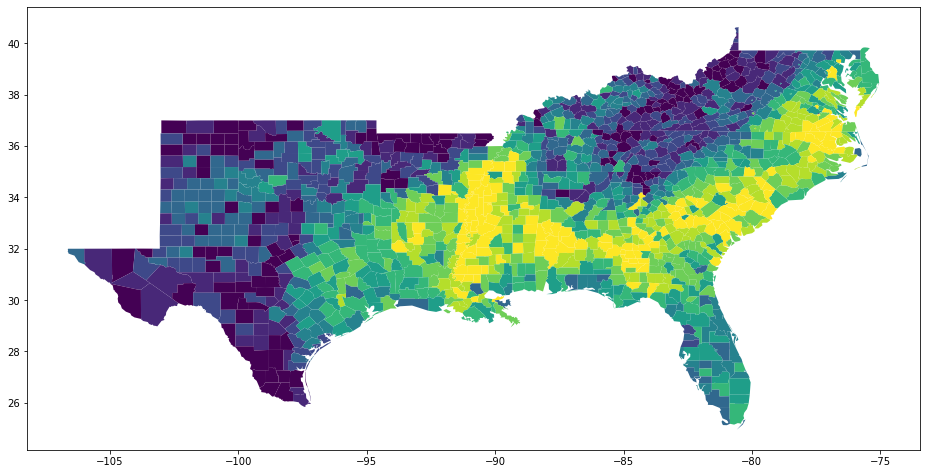

In [24]:
gdf.plot(column='BLK90', scheme='Quantiles', k=10, figsize=(16, 9))

We can peak under the hood a bit and recreate the classification object that was used in the previous choropleth:

In [25]:
q10 = mapclassify.Quantiles(gdf.BLK90,k=10)
q10

Quantiles             

   Interval      Count
----------------------
[ 0.00,  0.28] |   142
( 0.28,  1.54] |   141
( 1.54,  3.31] |   141
( 3.31,  5.72] |   141
( 5.72, 10.01] |   141
(10.01, 15.51] |   141
(15.51, 22.89] |   141
(22.89, 31.57] |   141
(31.57, 42.38] |   141
(42.38, 86.24] |   142

For quick, exploratory work, the classifier object has its own `plot` method that takes a geodataframe as an argument:

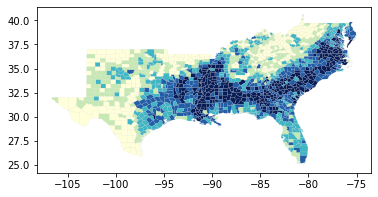

In [26]:
_ = q10.plot(gdf)

Back to working directly with the dataframe, we can toggle on the `legend`:

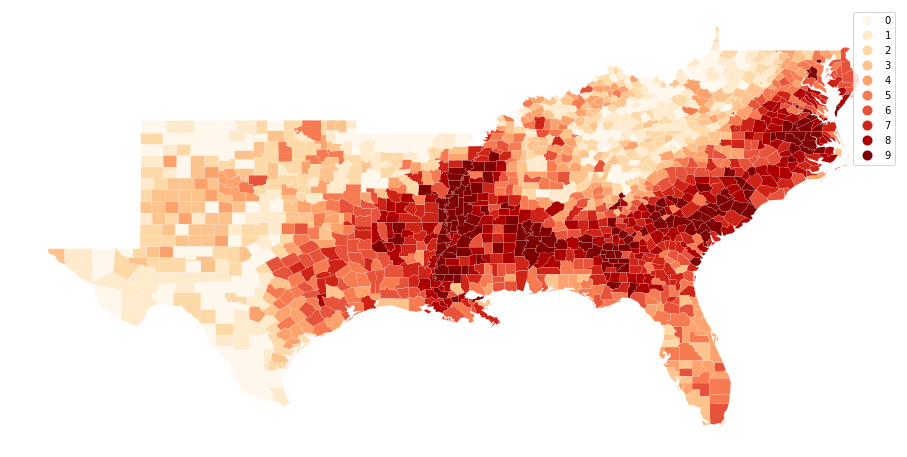

In [27]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(16, 9))
gdf.assign(cl=q10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

Here we see the 10 classes, but without more specific information on the legend, the user has to know that 0 is the first declile and 9 the 10th. We also do not know the values that define these classes. 

We can rectify this as follows:

In [28]:
q10.get_legend_classes()

['[ 0.00,  0.28]',
 '( 0.28,  1.54]',
 '( 1.54,  3.31]',
 '( 3.31,  5.72]',
 '( 5.72, 10.01]',
 '(10.01, 15.51]',
 '(15.51, 22.89]',
 '(22.89, 31.57]',
 '(31.57, 42.38]',
 '(42.38, 86.24]']

In [29]:
mapping = dict([(i,s) for i,s in enumerate(q10.get_legend_classes())])

In [30]:
mapping

{0: '[ 0.00,  0.28]',
 1: '( 0.28,  1.54]',
 2: '( 1.54,  3.31]',
 3: '( 3.31,  5.72]',
 4: '( 5.72, 10.01]',
 5: '(10.01, 15.51]',
 6: '(15.51, 22.89]',
 7: '(22.89, 31.57]',
 8: '(31.57, 42.38]',
 9: '(42.38, 86.24]'}

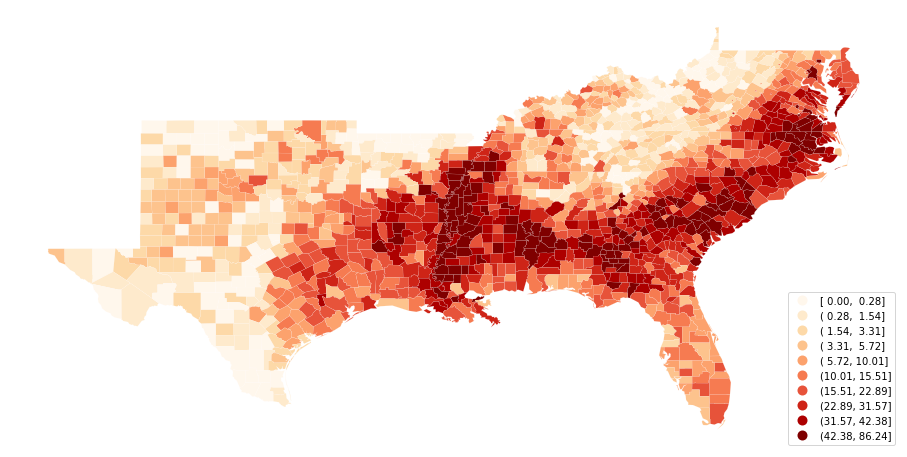

In [31]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(16, 9))
gdf.assign(cl=q10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True,
                          legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping)
plt.show()

## Interactive Exploration of Choropleth Classification

Next, we develop a small application that relies on `mapclassify` together with [palettable](https://jiffyclub.github.io/palettable/) and [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) to explore the choice of:

- classification method
- number of classes
- colormap



In [32]:
from palettable import colorbrewer
sequential = colorbrewer.COLOR_MAPS['Sequential']
diverging = colorbrewer.COLOR_MAPS['Diverging']
qualitative = colorbrewer.COLOR_MAPS['Qualitative']



In [33]:
sequential.keys()

dict_keys(['Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'])

In [34]:
from ipywidgets import interact, Dropdown, RadioButtons, IntSlider, VBox, HBox, FloatSlider, Button, Label

k_classifiers = {
    'equal_interval': mapclassify.EqualInterval,
    'fisher_jenks': mapclassify.FisherJenks,
    'jenks_caspall': mapclassify.JenksCaspall,
    'jenks_caspall_forced': mapclassify.JenksCaspallForced,
    'maximum_breaks': mapclassify.MaximumBreaks,
    'natural_breaks': mapclassify.NaturalBreaks,
    'quantiles': mapclassify.Quantiles,
    }

def k_values(ctype, cmap):
    k = list(colorbrewer.COLOR_MAPS[ctype][cmap].keys())
    return list(map(int, k))
    
def update_map(method='quantiles', k=5, cmap='Blues'):
    classifier = k_classifiers[method](gdf.BLK90, k=k)
    mapping = dict([(i,s) for i,s in enumerate(classifier.get_legend_classes())])
    #print(classifier)
    f, ax = plt.subplots(1, figsize=(16, 9))
    gdf.assign(cl=classifier.yb).plot(column='cl', categorical=True, \
        k=k, cmap=cmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True, \
        legend_kwds={'loc': 'lower right'})
    ax.set_axis_off()
    ax.set_title("Pct Black 1990")
    replace_legend_items(ax.get_legend(), mapping)

    plt.show()
    


data_type = RadioButtons(options=['Sequential', 'Diverging', 'Qualitative']) # options for data type

bindings = {'Sequential': range(3,9+1),
            'Diverging': range(3,11+1),
            'Qualitative': range(3,12+1)}

cmap_bindings = {'Sequential': list(sequential.keys()),
                 'Diverging': list(diverging.keys()),
                 'Qualitative': list(qualitative.keys())}

class_val = Dropdown(options=bindings[data_type.value])  # ocjjptions for number of classes
cmap_val = Dropdown(options=cmap_bindings[data_type.value]) # options for colormaps for data type

def type_change(change):
    class_val.options = bindings[change['new']]
    cmap_val.options = cmap_bindings[change['new']]

def cmap_change(change):
    cmap=change['new']
    ctype = data_type.value
    k = k_values(ctype, cmap)
    class_val.options = k
    
data_type.observe(type_change, names=['value'])
cmap_val.observe(cmap_change, names=['value'])


from ipywidgets import Output, Tab
out = Output()
#t = Tab()
#t.children = [out]
#t

# In this case, the interact function must be defined after the conditions stated above...
# therefore, the k now depends on the radio button 

with out:
    interact(update_map, method=list(k_classifiers.keys()), cmap=cmap_val, k = class_val)
   

display(VBox([data_type, out]))



Changing the type of colormap (sequential, diverging, qualitative) will update the options for the available color maps (`cmap`). Changining any of the values using the dropdowns will update the classification and the resulting choropleth map.

It is important to note that the example variable is best portrayed with the sequential colormaps. The other two types of colormaps are included for demonstration purposes only.

## Extend for selecting time series

In [39]:
time_series_variables = [f'HR{y}' for y in [60, 70, 80, 90]]

In [40]:
time_series_variables

['HR60', 'HR70', 'HR80', 'HR90']

In [64]:
from ipywidgets import IntSlider

In [65]:
def time_variable(x):
    return x

In [66]:
interact(time_variable, x=IntSlider(min=60, max=90, step=10, value=60));

interactive(children=(IntSlider(value=60, description='x', max=90, min=60, step=10), Output()), _dom_classes=(…

In [70]:
from ipywidgets import interact, Dropdown, RadioButtons, IntSlider, VBox, HBox, FloatSlider, Button, Label

k_classifiers = {
    'equal_interval': mapclassify.EqualInterval,
    'fisher_jenks': mapclassify.FisherJenks,
    'jenks_caspall': mapclassify.JenksCaspall,
    'jenks_caspall_forced': mapclassify.JenksCaspallForced,
    'maximum_breaks': mapclassify.MaximumBreaks,
    'natural_breaks': mapclassify.NaturalBreaks,
    'quantiles': mapclassify.Quantiles,
    }

def k_values(ctype, cmap):
    k = list(colorbrewer.COLOR_MAPS[ctype][cmap].keys())
    return list(map(int, k))
    
def update_map(decade="60", method='quantiles', k=5, cmap='Blues'):
    decade = time_selector.value
    variable = f"BLK{decade}"
    classifier = k_classifiers[method](gdf[variable], k=k)
    mapping = dict([(i,s) for i,s in enumerate(classifier.get_legend_classes())])
    #print(classifier)
    f, ax = plt.subplots(1, figsize=(16, 9))
    gdf.assign(cl=classifier.yb).plot(column='cl', categorical=True, \
        k=k, cmap=cmap, linewidth=0.1, ax=ax, \
        edgecolor='green', legend=True, \
        legend_kwds={'loc': 'lower right'})
    ax.set_axis_off()
    ax.set_title(f"Pct Black 19{decade}")
    replace_legend_items(ax.get_legend(), mapping)

    plt.show()
    


data_type = RadioButtons(options=['Sequential', 'Diverging', 'Qualitative']) # options for data type

bindings = {'Sequential': range(3,9+1),
            'Diverging': range(3,11+1),
            'Qualitative': range(3,12+1)}

cmap_bindings = {'Sequential': list(sequential.keys()),
                 'Diverging': list(diverging.keys()),
                 'Qualitative': list(qualitative.keys())}

class_val = Dropdown(options=bindings[data_type.value])  # ocjjptions for number of classes
cmap_val = Dropdown(options=cmap_bindings[data_type.value]) # options for colormaps for data type

def type_change(change):
    class_val.options = bindings[change['new']]
    cmap_val.options = cmap_bindings[change['new']]

def cmap_change(change):
    cmap=change['new']
    ctype = data_type.value
    k = k_values(ctype, cmap)
    class_val.options = k
    
data_type.observe(type_change, names=['value'])
cmap_val.observe(cmap_change, names=['value'])

time_selector = IntSlider(value=60, min=60, max=90, step=10, description='Decade')

#def time_change(decade):
#       print(decade)
#time_selector.observe(time_change, names=['value'])

from ipywidgets import Output, Tab
out = Output()
#t = Tab()
#t.children = [out]
#t

# In this case, the interact function must be defined after the conditions stated above...
# therefore, the k now depends on the radio button 

with out:
    #interact(time_change, decade=IntSlider(min=60, max=90, step=10, value=60));
    interact(update_map, method=list(k_classifiers.keys()), cmap=cmap_val,
             k = class_val, decade=time_selector)
   

display(VBox([data_type, out]))

